In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from pandas import DataFrame

def import_data(filename):
    data = pd.read_csv(filename, sep=',')
    return data

df = import_data('../../datasets_clean/demographics.csv')
df['zip'] = df['zip'].apply(lambda x: '{0:0>5}'.format(x))
df

,Unnamed: 0,zip,po_name,pop2010,pop2013,white,black,ameri_es,asian,hawn_pi,...,households,ave_hh_sz,hsehld_1_m,hsehld_1_f,marhh_chd,marhh_no_c,mhh_child,fhh_child,families,ave_fam_sz
0,337,02119,Roxbury,25095,25547,4061,14748,233,382,15,...,9898,2.43,2037,2125,887,987,255,2214,5707,3.16
1,339,02121,Dorchester,25566,26160,1942,18056,187,198,10,...,9546,2.67,1397,1789,932,805,314,2922,6328,3.28
2,340,02122,Dorchester,22215,22342,8353,6434,75,3794,13,...,7786,2.80,1457,1390,1348,1122,285,1251,4902,3.45
3,342,02125,Dorchester,34002,35298,11570,10534,155,3643,29,...,12187,2.70,2683,2392,1569,1654,383,2116,7078,3.38
4,369,02113,Boston,6455,6478,6110,45,13,164,3,...,4056,1.59,1517,1850,117,384,7,36,686,2.42
5,370,02114,Boston,12093,12176,9743,819,14,1139,2,...,7013,1.57,2464,2863,366,1045,19,82,1685,2.40
6,371,02115,Boston,26697,27239,18401,2295,67,4091,13,...,10128,1.73,3847,4116,364,1035,43,370,2158,2.58
7,372,02116,Boston,20161,20496,15538,1192,24,2666,3,...,10808,1.62,3710,3877,686,2050,42,178,3214,2.50
8,374,02118,Boston,26610,27320,13744,5462,93,4036,10,...,12465,1.95,4465,3469,974,1684,123,1085,4527,2.94
9,375,02126,Mattapan,24077,24832,1565,19971,133,237,9,...,8897,2.68,1164,1628,1122,1288,291,1948,6079,3.22


In [3]:
# https://levelup.gitconnected.com/visualizing-housing-data-with-folium-maps-4718ed3452c2
import folium
import json
import numpy as np

def get_center_latlong(df):
    #center lat long of boston
    return (42.361145, -71.057083)
    
def plot_demographic_heatmap(df,col, output_path):
    # this line just to force our dataset zipcodes from numbers to strings so they match our geojson file
    df['zip'] = df['zip'].astype('str')


    # load my geojson file which contains my Polygons
    boundary_file = '../../datasets_clean/Boston_ZIP_Codes.geojson'
    with open(boundary_file, 'r') as f:
        zipcode_boundary = json.load(f)


    # Grab my map center again using our created fucntion (same as before)
    center = get_center_latlong(df)


    # Initialize Folium Map again (same as before)
    m = folium.Map(location=center, 
                   zoom_start=10)


    # Use the groupby method to 
    zipcode_data = df.groupby('zip').aggregate(np.mean)
    zipcode_data.reset_index(inplace = True)


    # Create choropleth map  
    folium.Choropleth(
        geo_data=zipcode_boundary,
        name='choropleth',
        data=zipcode_data,
        columns=['zip', col],
        key_on='feature.properties.ZIP5',
        fill_color='Spectral',
        fill_opacity=0.6,
        nan_fill_opacity=0,
        line_opacity=1,
        legend_name='Avg Population Density'
    ).add_to(m)


    m.save(output_path)

In [4]:
print(df.columns)
print(df['zip'])

Index(['Unnamed: 0', 'zip', 'po_name', 'pop2010', 'pop2013', 'white', 'black',
       'ameri_es', 'asian', 'hawn_pi', 'hispanic', 'other', 'mult_race',
       'males', 'females', 'age_under5', 'age_5_9', 'age_10_14', 'age_15_19',
       'age_20_24', 'age_25_34', 'age_35_44', 'age_45_54', 'age_55_64',
       'age_65_74', 'age_75_84', 'age_85_up', 'med_age', 'med_age_m',
       'med_age_f', 'households', 'ave_hh_sz', 'hsehld_1_m', 'hsehld_1_f',
       'marhh_chd', 'marhh_no_c', 'mhh_child', 'fhh_child', 'families',
       'ave_fam_sz'],
      dtype='object')
0     02119
1     02121
2     02122
3     02125
4     02113
5     02114
6     02115
7     02116
8     02118
9     02126
10    02127
11    02128
12    02129
13    02130
14    02131
15    02132
16    02136
17    02134
18    02135
19    02108
20    02109
21    02110
22    02111
23    02163
24    02210
25    02199
26    02215
Name: zip, dtype: object


In [5]:
#plot demographic heat maps
plot_demographic_heatmap(df,'hispanic','maps/ethnicity/hispanic.html')
plot_demographic_heatmap(df,'white','maps/ethnicity/white.html')
plot_demographic_heatmap(df,'black','maps/ethnicity/black.html')
plot_demographic_heatmap(df,'ameri_es','maps/ethnicity/ameri_es.html')
plot_demographic_heatmap(df,'asian','maps/ethnicity/asian.html')
plot_demographic_heatmap(df,'hawn_pi','maps/ethnicity/hawn_pi.html')
plot_demographic_heatmap(df,'hispanic','maps/ethnicity/hispanic.html')
plot_demographic_heatmap(df,'other','maps/ethnicity/other.html')
plot_demographic_heatmap(df,'mult_race','maps/ethnicity/mult_race.html')


In [6]:
#graph population
plot_demographic_heatmap(df,'pop2013','maps/pop2013.html')

po_name      Boston
hispanic       1751
white         14754
black           877
ameri_es         40
asian          4251
hawn_pi          10
hispanic       1751
other           466
mult_race       466
Name: 02215, dtype: object


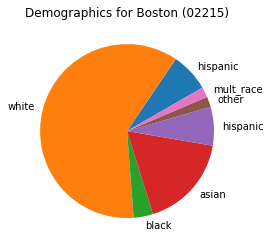

In [14]:
#https://stackoverflow.com/questions/41787006/making-multiple-pie-charts-out-of-a-pandas-dataframe-one-for-each-row/41787990
def demographic_by_zip(zipcode, df):
    df_race = df[['zip', 'po_name', 'hispanic','white','black','ameri_es','asian','hawn_pi','hispanic','other','mult_race']]    

    row = df_race.set_index('zip').loc[zipcode]
        
    print(row)
    town_name = df.set_index('zip').loc[zipcode]['po_name']
    row.drop('po_name', inplace=True)
    row = row[row.gt(row.sum() * .01)]
    fig = plt.figure()
    plt.pie(row, labels=row.index, startangle=30)
    plt.title(f'Demographics for {town_name} ({zipcode})')
    plt.show()

demographic_by_zip('02215',df)

During our presentations, 4 major zipcodes were singled out as having a lack of amenities: 02126 (Mattapan), 02130 (Jamaica Plain), 02132 (West Roxbury), 02136 (Hyde Park)

po_name      Mattapan
hispanic         2833
white            1565
black           19971
ameri_es          133
asian             237
hawn_pi             9
hispanic         2833
other            1276
mult_race        1276
Name: 02126, dtype: object


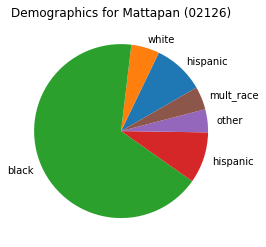

po_name      Jamaica Plain
hispanic              7717
white                23025
black                 4819
ameri_es               196
asian                 1705
hawn_pi                  8
hispanic              7717
other                 3162
mult_race             3162
Name: 02130, dtype: object


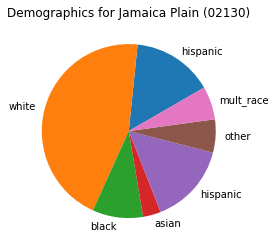

po_name      West Roxbury
hispanic             1946
white               22433
black                1717
ameri_es               47
asian                1907
hawn_pi                 8
hispanic             1946
other                 682
mult_race             682
Name: 02132, dtype: object


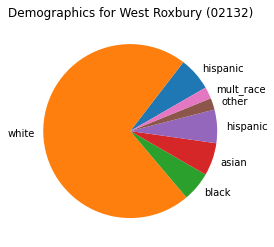

po_name      Hyde Park
hispanic          6447
white            10834
black            14222
ameri_es           134
asian              530
hawn_pi             21
hispanic          6447
other             2923
mult_race         2923
Name: 02136, dtype: object


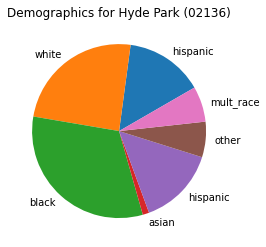

In [15]:
demographic_by_zip('02126', df)
demographic_by_zip('02130', df)
demographic_by_zip('02132', df)
demographic_by_zip('02136', df)